In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('/content/data_hw_reg.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1116 non-null   datetime64[ns]
 1   country    1116 non-null   object        
 2   confirmed  1116 non-null   int64         
 3   deaths     1116 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 35.0+ KB


<ipython-input-22-3fbfd559279e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['confirmed'])


<Axes: xlabel='confirmed', ylabel='Density'>

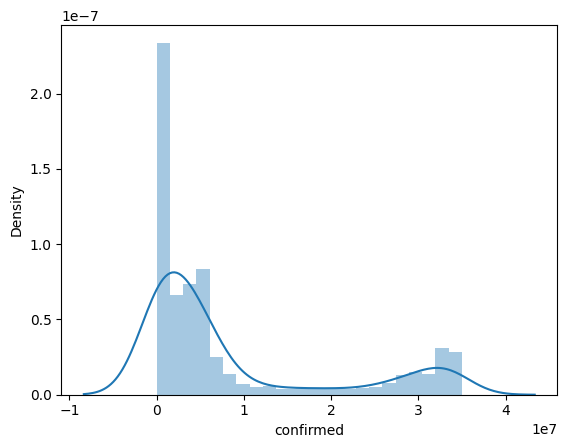

In [22]:
# Распределение признака 'confirmed'
sns.distplot(df['confirmed'])

<ipython-input-23-2376648403de>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['deaths'])


<Axes: xlabel='deaths', ylabel='Density'>

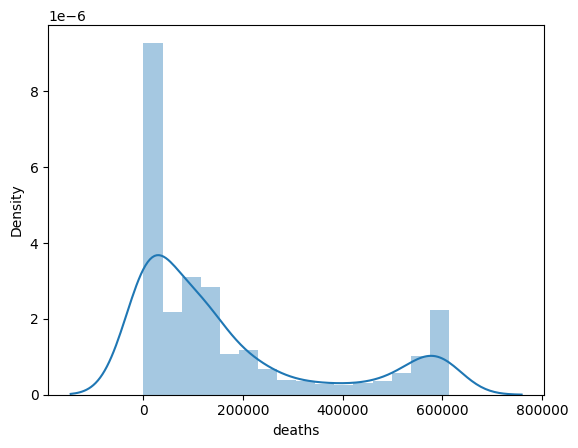

In [23]:
# Распределение признака 'deaths'
sns.distplot(df['deaths'])

Вывод: данные распределены НЕнормально

In [20]:
df['confirmed'].corr(df['deaths'], method='kendall') # Распределение ненормально используем корреляцию Кендалла

0.9315973582793184

In [10]:
from sklearn.preprocessing import LabelEncoder

# Кодируем страны
encoder = LabelEncoder()
df['country_bin'] = encoder.fit_transform(df['country'])
df

,date,country,confirmed,deaths,country_bin
0,2020-01-22,Russia,0,0,0
1,2020-01-22,US,1,0,1
2,2020-01-23,Russia,0,0,0
3,2020-01-23,US,1,0,1
4,2020-01-24,Russia,0,0,0
...,...,...,...,...,...
1111,2021-07-30,US,34945468,613013,1
1112,2021-07-31,Russia,6185249,155952,0
1113,2021-07-31,US,34978276,613157,1
1114,2021-08-01,Russia,6207513,156726,0


<Axes: >

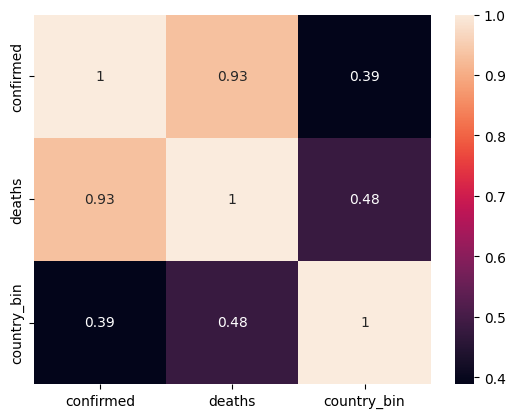

In [21]:
# Матрица корреляции
df_cut = df[['confirmed', 'deaths', 'country_bin']]
sns.heatmap(df_cut.corr(method='kendall'), annot=True)

# Построение модели Линейной Регрессии

## Для России


In [26]:
df_rus = df_cut[df_cut['country_bin']==0]

<Axes: xlabel='confirmed', ylabel='deaths'>

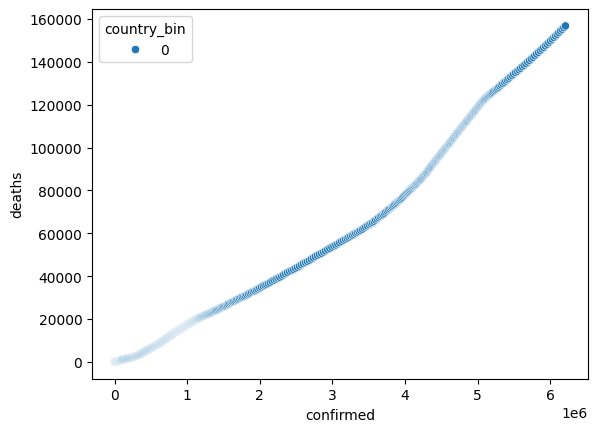

In [27]:
# Оценим зависимость заболеваемости от смертности
sns.scatterplot(data=df_rus, x='confirmed', y='deaths', hue='country_bin')

In [41]:
# Строим модель линейной регрессии
from sklearn.linear_model import LinearRegression

x_rus = df_rus['confirmed'].values.reshape(-1, 1)
y_rus = df_rus['deaths']
model_rus = LinearRegression()
model_rus.fit(x_rus,y_rus)

LinearRegression()

In [42]:
a = model_rus.intercept_
b = model_rus.coef_

print(f'Уравнение регрессии: {a} + {b[0]}*X')

Уравнение регрессии: -5713.8279207801315 + 0.02352536850263536*X


In [43]:
# прогноз
pred_confirm = np.array([25_000_000]).reshape(-1, 1)
model_rus.predict(pred_confirm)

array([582420.3846451])

## Для США

In [39]:
df_us = df_cut[df_cut['country_bin']==1]

<Axes: xlabel='confirmed', ylabel='deaths'>

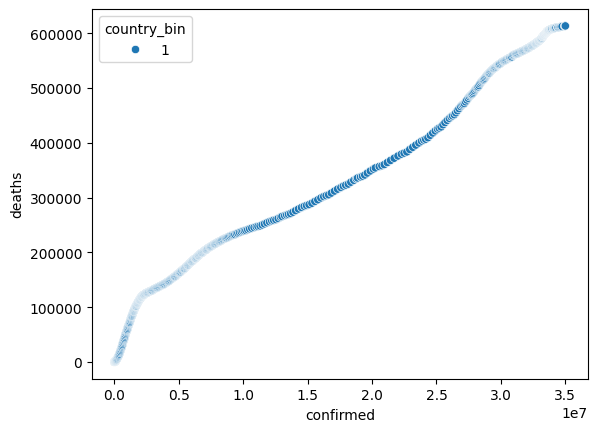

In [40]:
# Оценим зависимость заболеваемости от смертности
sns.scatterplot(data=df_us, x='confirmed', y='deaths', hue='country_bin')

In [45]:
# Построение модели
x_us = df_us['confirmed'].values.reshape(-1, 1)
y_us = df_us['deaths']

model_us = LinearRegression()
model_us.fit(x_us, y_us)


LinearRegression()

In [46]:
a = model_us.intercept_
b = model_us.coef_

print(f'Уравнение регрессии: {a} + {b[0]}*X')

Уравнение регрессии: 51569.989853807376 + 0.016247024325273755*X


In [47]:
# прогноз
pred_confirm = np.array([25_000_000]).reshape(-1, 1)
model_us.predict(pred_confirm)

array([457745.59798565])